 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [305]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [306]:
# define path for the csv files
whale_returns_csv = Path('Resources/whale_returns.csv')
algo_returns_csv = Path('Resources/algo_returns.csv')
sp_tsx_history_csv = Path('Resources/sp_tsx_history.csv')

In [307]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns_csv,index_col='Date',infer_datetime_format=True, parse_dates=True)

In [308]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [309]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [310]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns_csv,index_col='Date',infer_datetime_format=True, parse_dates=True)

In [311]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [312]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [313]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv,index_col='Date',infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [314]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [315]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.strip('$')
sp_tsx_history_df['Close'] = pd.to_numeric(sp_tsx_history_df['Close'].str.replace(',',''))

In [316]:
# Calculate Daily Returns
sp_tsx_history_df = sp_tsx_history_df.pct_change()

In [317]:
# Drop nulls
sp_tsx_history_df = sp_tsx_history_df.dropna()

In [318]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df = sp_tsx_history_df.rename(columns={'Close':'S&P_TSX60'})
sp_tsx_history_df

,S&P_TSX60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [344]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df = pd.concat([whale_returns_df,algo_returns_df,sp_tsx_history_df],axis="columns",join="inner")
portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

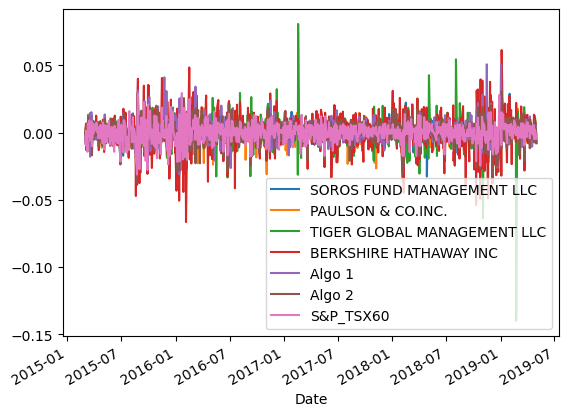

In [320]:
# Plot daily returns of all portfolios
portfolio_df.plot()

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

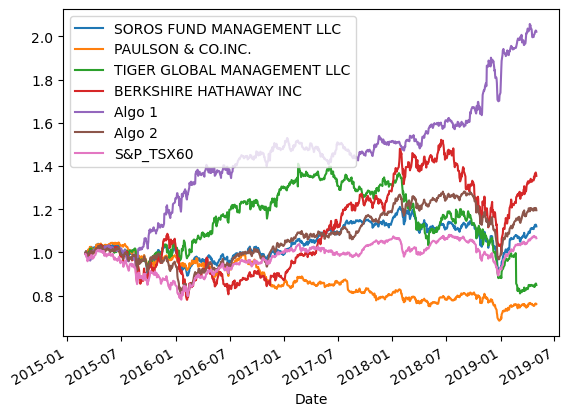

In [322]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1+portfolio_df).cumprod()
# Plot cumulative returns
cumulative_returns_df.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

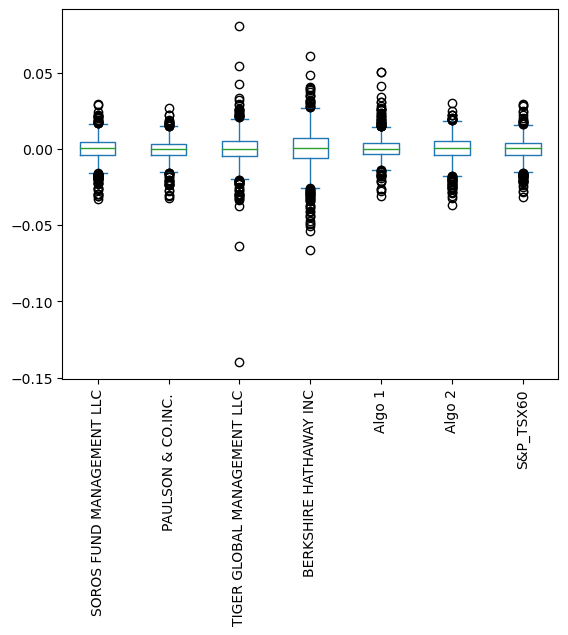

In [157]:
# Box plot to visually show risk
portfolio_df.plot.box(rot=90)

### Calculate Standard Deviations

In [323]:
# Calculate the daily standard deviations of all portfolios
daily_std = portfolio_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P_TSX60                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [324]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_snp = portfolio_df['S&P_TSX60'].std()
# Determine which portfolios are riskier than the S&P TSX 60
riskier_than_snp = []
for idx,std in daily_std.items():
    if std > daily_std_snp:
        riskier_than_snp.append(idx)
print(f"{riskier_than_snp} are riskier than S&P TSX60")

['SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2'] are riskier than S&P TSX60


### Calculate the Annualized Standard Deviation

In [166]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P_TSX60                      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

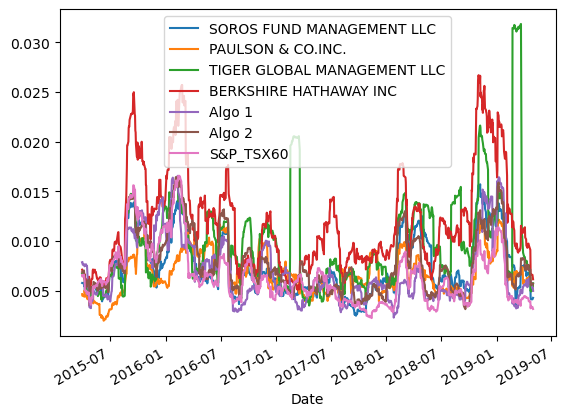

In [325]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [326]:
# Calculate the correlation
correlation = portfolio_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P_TSX60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Rolling 60 day beta of Algo 2'}, xlabel='Date'>

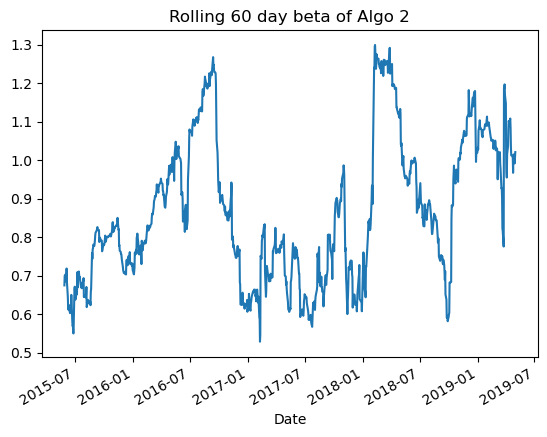

In [327]:
# Calculate 60 day rolling covariance of a single portfolio
covariance = portfolio_df['Algo 2'].rolling(window=60).cov(portfolio_df['S&P_TSX60'])
# Calculate 60 day rolling variance of S&P TSX
variance_snp = portfolio_df['S&P_TSX60'].rolling(window=60).var()
# Computing beta
beta_algo_2 = covariance / variance_snp
# Plot beta trend
beta_algo_2.plot(title="Rolling 60 day beta of Algo 2")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [328]:
# Use `ewm` to calculate the rolling window
ewm = daily_std.ewm(halflife=21).mean()
ewm

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.007398
TIGER GLOBAL MANAGEMENT LLC    0.008598
BERKSHIRE HATHAWAY INC         0.009708
Algo 1                         0.009256
Algo 2                         0.009088
S&P_TSX60                      0.008765
dtype: float64

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [331]:
# Annualized Sharpe Ratios
annual_sharpe_ratio = (portfolio_df.mean() * 252)/annual_std

<Axes: title={'center': 'Annual Sharpe Ratio'}>

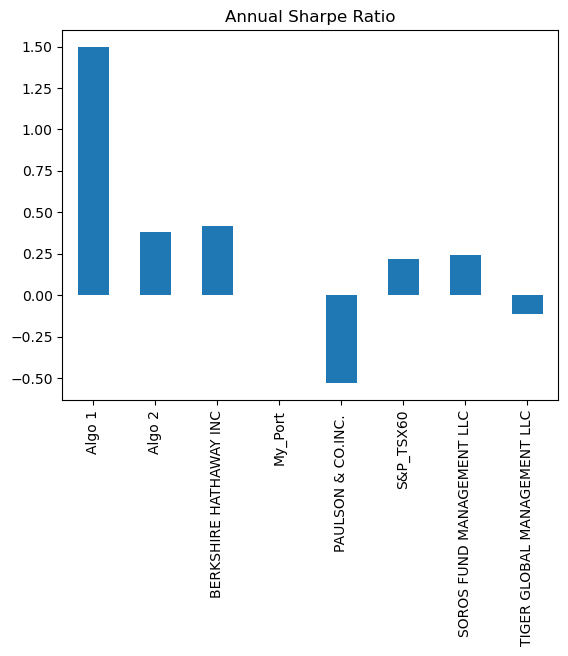

In [332]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratio.plot(kind="bar",title="Annual Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

The Algo 1 out perform all other portfolios while the Algo 2 is only a little behind the "Berkshire Hathaway", in the measure of sharpe ratio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [333]:
# Reading data from 1st stock
shop_df = pd.read_csv(Path('Resources/shop_historical.csv'),index_col='Date',infer_datetime_format=True,parse_dates=True)
shop_df

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [334]:
# Reading data from 2nd stock
otex_df = pd.read_csv(Path('Resources/otex_historical.csv'),index_col='Date',infer_datetime_format=True,parse_dates=True)
otex_df

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [335]:
# Reading data from 3rd stock
l_df = pd.read_csv(Path('Resources/l_historical.csv'),index_col='Date',infer_datetime_format=True,parse_dates=True)
l_df

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [336]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([shop_df,otex_df,l_df],axis=1,join="inner")
combined_df

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...
2019-12-20,SHOP,513.22,OTEX,58.68,L,67.90
2019-12-23,SHOP,511.62,OTEX,57.89,L,67.68
2019-12-24,SHOP,525.39,OTEX,57.44,L,67.67


In [338]:
# Reset Date index
combined_df.reset_index()

,Date,Symbol,Close,Symbol,Close,Symbol,Close
0,2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
1,2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2,2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
3,2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
4,2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...,...
496,2019-12-20,SHOP,513.22,OTEX,58.68,L,67.90
497,2019-12-23,SHOP,511.62,OTEX,57.89,L,67.68
498,2019-12-24,SHOP,525.39,OTEX,57.44,L,67.67
499,2019-12-27,SHOP,534.76,OTEX,57.70,L,67.78


In [339]:
# Reorganize portfolio data by having a column per symbol
#combined_df.columns = ['Symbol1','SHOP','Symbol2','OTEX','Symbol3','L']
combined_df = combined_df.drop(labels=['Symbol','Symbol','Symbol'],axis=1)
combined_df.columns = ['SHOP','OTEX','L']
combined_df

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [340]:
# Calculate daily returns
daily_returns = combined_df.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.sample(5)

,SHOP,OTEX,L
Date,,,
2019-03-08,0.009646,-0.004941,-0.006594
2019-08-09,0.032255,-0.005094,0.010751
2018-04-05,-0.003830,-0.002955,0.000366
2018-06-25,-0.058149,-0.026294,0.000000
2018-10-02,-0.041858,-0.013642,-0.003084


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [341]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = daily_returns.dot(weights)
weighted_df = pd.DataFrame({'My_Port':weighted_returns})
weighted_df

,My_Port
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999
...,...
2019-12-20,0.007495
2019-12-23,-0.006607
2019-12-24,0.006331


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [345]:
# Join your returns DataFrame to the original returns DataFrame
# portfolio dates were from 2015, now combine with my port the df dated from 2018. Unmatched dates are not included
joined_df = pd.concat([portfolio_df,weighted_df],axis=1,join="inner")
joined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX60,My_Port
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [347]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.isnull().sum()
# Shows no NaN because we used join="inner"

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P_TSX60                      0
My_Port                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [348]:
# Calculate the annualized `std`
annual_std = joined_df.std() * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P_TSX60                      0.099121
My_Port                        0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

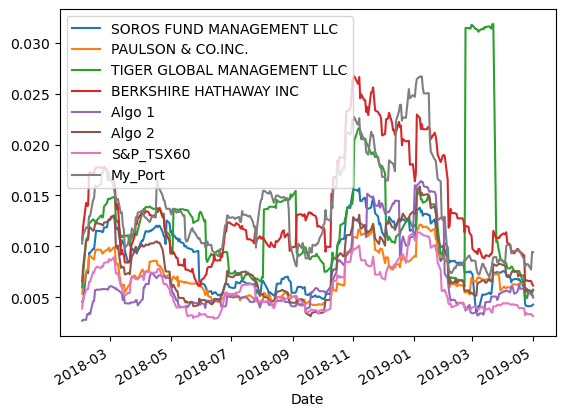

In [349]:
# Calculate rolling standard deviation
rolling_std = joined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

In [351]:
# Calculate and plot the correlation
correlation = joined_df.corr()
correlation.style.background_gradient()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX60,My_Port
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P_TSX60,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
My_Port,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60 day beta of My Portfolio'}, xlabel='Date'>

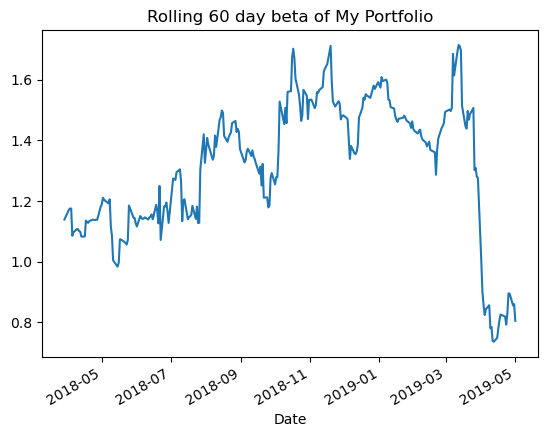

In [352]:
# Calculate and plot Beta
covariance = joined_df['My_Port'].rolling(window=60).cov(joined_df['S&P_TSX60'])
variance_snp = joined_df['S&P_TSX60'].rolling(window=60).var()
beta_my_port = covariance / variance_snp
beta_my_port.plot(title="Rolling 60 day beta of My Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [353]:
# Calculate Annualized Sharpe Ratios
annual_sharpe_ratio = (joined_df.mean() * 252) / annual_std

<Axes: title={'center': 'Annual Sharpe Ratio'}>

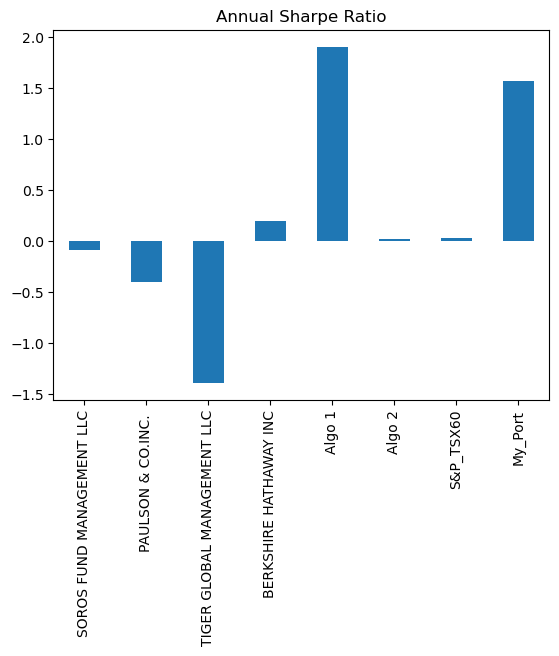

In [293]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratio.plot(kind="bar",title="Annual Sharpe Ratio")

### How does your portfolio do?

My portfolio does well, having a sharpe ratio over other portfolios except Algo 1.